### Import Libraries and Setup First, we import all necessary libraries for data manipulation, visualization, and analysis:
### pandas and numpy for data processing
### matplotlib and seaborn for static visualizations
### plotly for interactive charts We also configure visualization settings and suppress warnings for cleaner output.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , roc_auc_score
# Configure visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

print("Libraries Imported Successfully")

Libraries Imported Successfully


### Load Dataset: We load the Telco Customer Churn dataset from the Kaggle input directory. This dataset contains information about telecom customers, their services, account details, and whether they churned (left the company) or not.

In [22]:
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset Loaded Successfully")
except FileNotFoundError:
    print("File not found. Please add the 'Telco Customer Churn' dataset to your notebook.")

Dataset Loaded Successfully


### Initial Data Exploration and Cleaning In this section, we perform initial data exploration to understand the structure and quality of our dataset:

### Display dataset information - Check data types and non-null counts 
### 2. Preview the data - View the first few rows
### 3. Data type conversion - Convert TotalCharges to numeric (it contains spaces instead of NaN values)
### 4. Handle missing values - Fill missing values in TotalCharges (these are new customers with tenure=0)
### 5. Check for duplicates - Ensure data integrity
### 6. Generate descriptive statistics - Understand numerical feature distributions
### 7. Create binary target variable - Convert 'Yes'/'No' to 1/0 for correlation analysis

In [23]:
print("\n--- Dataset Information ---")
df.info()

print("\n--- First 5 Rows ---")
display(df.head())

# Convert TotalCharges to numeric type (contains spaces instead of NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
print("\n--- Missing Values ---")
print(missing_values[missing_values > 0])

# Fill missing values (only 11 missing values - new customers with tenure=0)
df['TotalCharges'].fillna(0, inplace=True)

# Check for duplicates
print(f"\nDuplicates found: {df.duplicated().sum()}")

# Descriptive statistics for numerical features
print("\n--- Descriptive Statistics (Numerical Features) ---")
display(df.describe())

# Create binary target variable for correlation analysis
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Missing Values ---
TotalCharges    11
dtype: int64

Duplicates found: 0

--- Descriptive Statistics (Numerical Features) ---


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Visualization 1: Target Variable Distribution¶ We visualize the distribution of our target variable (Churn) using a pie chart. This helps us understand:

### The proportion of customers who churned vs. those who stayed Whether we have a balanced or imbalanced dataset This is crucial for understanding the baseline and potential class imbalance issues in predictive modeling.

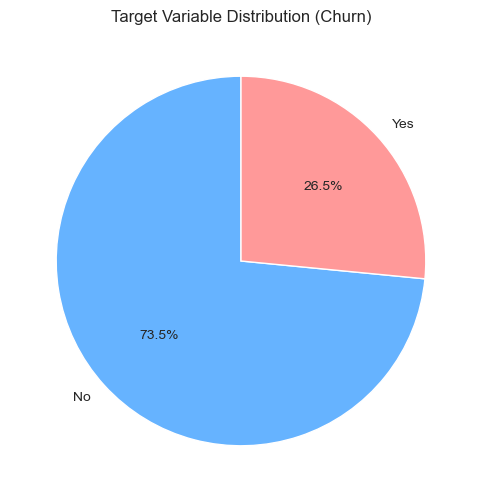

In [24]:
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Target Variable Distribution (Churn)')
plt.show()

### Visualization 2: Numerical Feature Distributions We create histograms with kernel density estimation (KDE) for three key numerical features:

### Tenure - Number of months the customer has been with the company
### Monthly Charges - The amount charged to the customer monthly
### Total Charges - Total amount charged to the customer
### These distributions help us understand:

### Customer loyalty patterns (tenure)
### Pricing structure and customer segments (charges)
### Potential outliers or unusual patterns

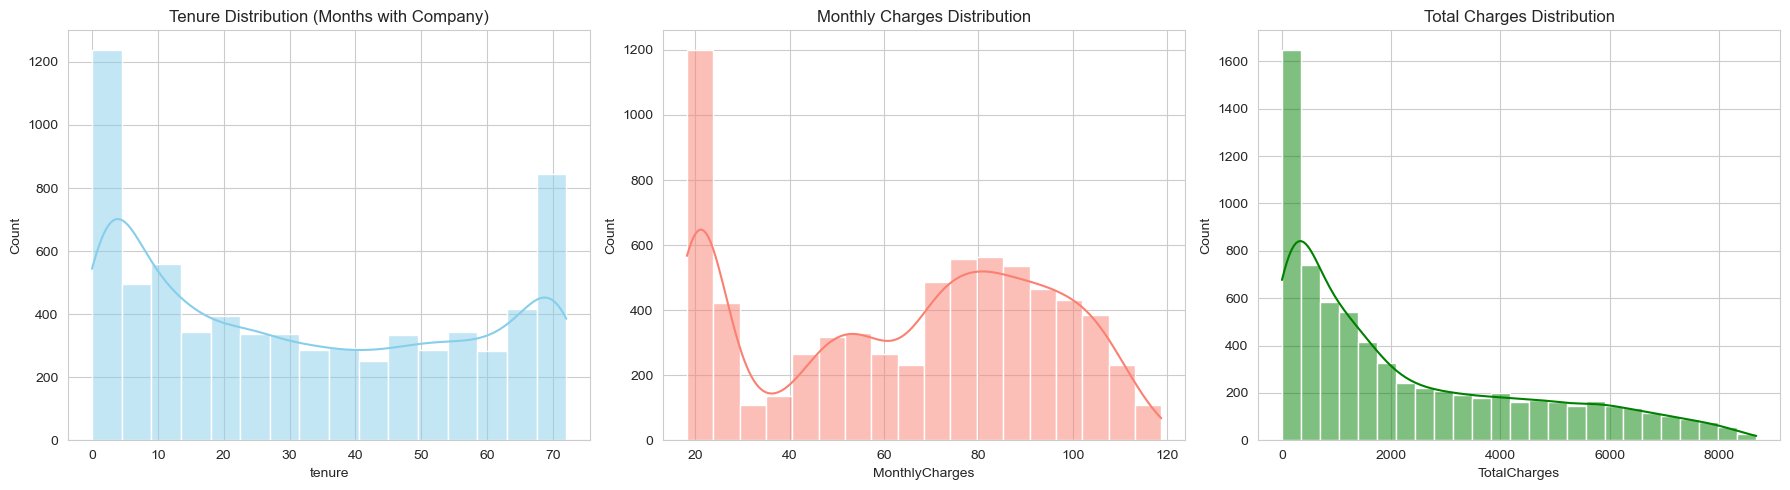

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['tenure'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Tenure Distribution (Months with Company)')

sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Monthly Charges Distribution')

sns.histplot(df['TotalCharges'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()


### Visualization 3: Churn by Contract Type This count plot shows the relationship between contract type and customer churn. We examine three contract types:

### Month-to-month
### One year
### Two year
### This visualization helps identify:

### Which contract types have higher churn rates
### The effectiveness of long-term contracts in retaining customers
### Potential areas for business strategy improvement

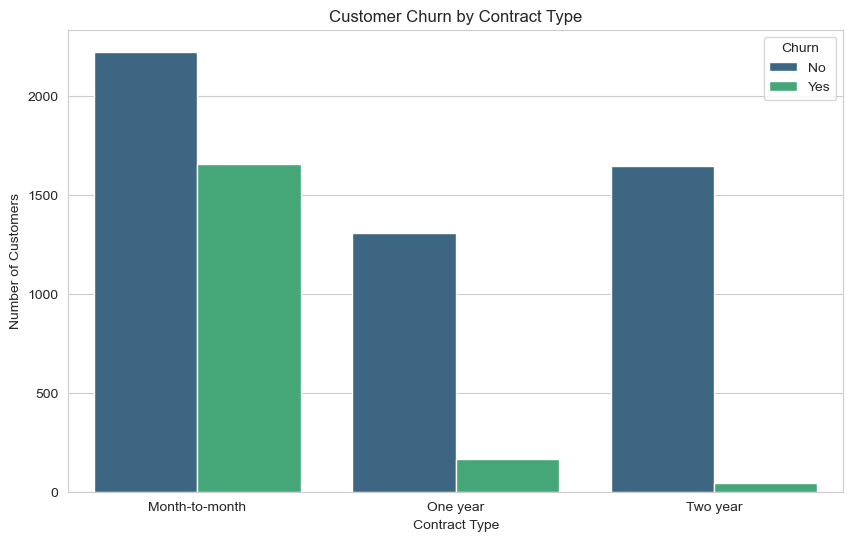

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Customer Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

### Visualization 4: Numerical Features vs Churn (Box Plots)¶ Box plots help us compare the distribution of numerical features between churned and retained customers:

### Tenure vs Churn - Do customers who stay longer churn less?
### Monthly Charges vs Churn - Does pricing affect churn rates?
### These plots reveal:

### Median values and quartiles for each group
### Outliers in the data
### Clear differences between churned and retained customer segments

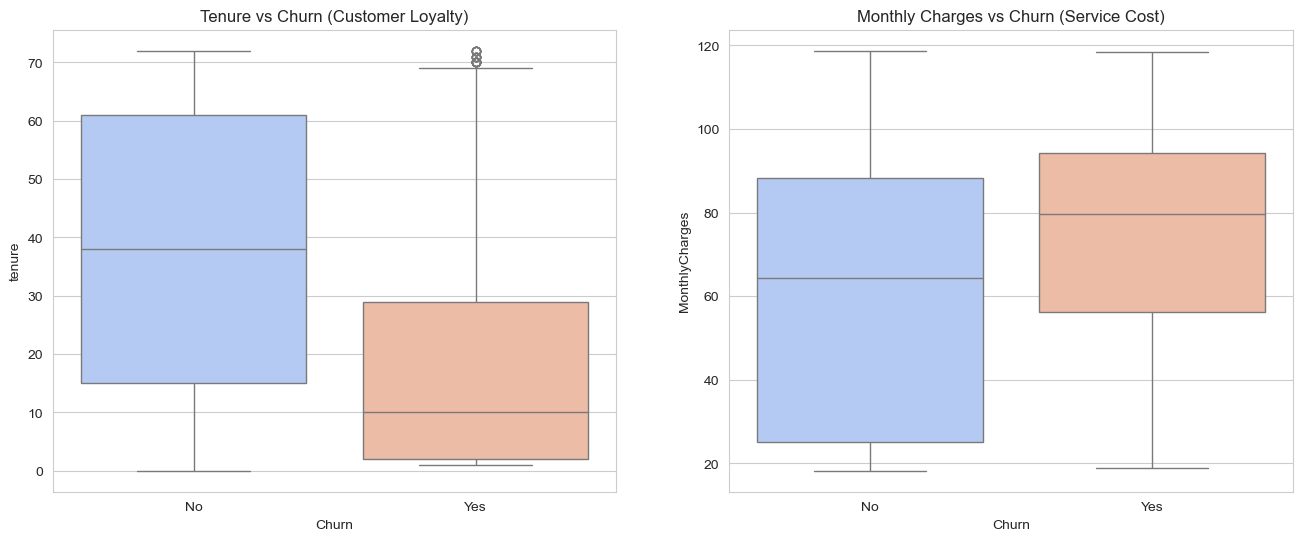

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Tenure vs Churn (Customer Loyalty)')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Monthly Charges vs Churn (Service Cost)')

plt.show()

### Visualization 5: Correlation Heatmap Finally, we create a correlation heatmap to understand the relationships between numerical features and the target variable (Churn).

### The heatmap shows:

### Positive correlations - Features that increase together
### Negative correlations - Features that move in opposite directions
### Strength of relationships - Values closer to 1 or -1 indicate stronger correlations
### This helps identify:

### Which features are most predictive of churn
### Multicollinearity between features
### Key drivers of customer behavior

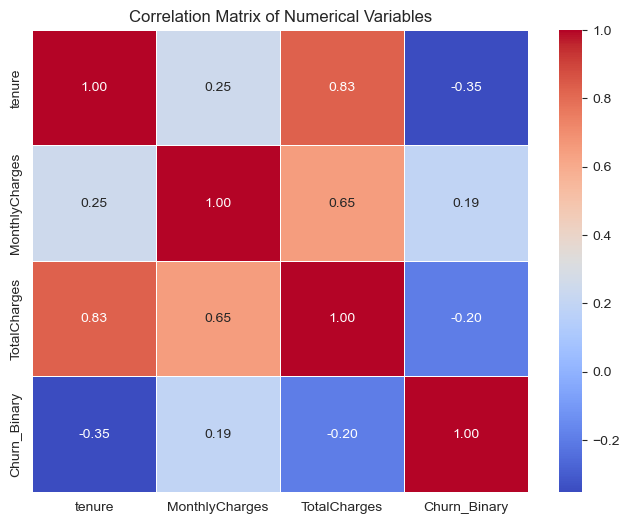

In [28]:
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Exploratory Data Analysis (EDA)

### Target Variable Distribution

In [29]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [30]:
df["Churn"].value_counts(normalize = True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

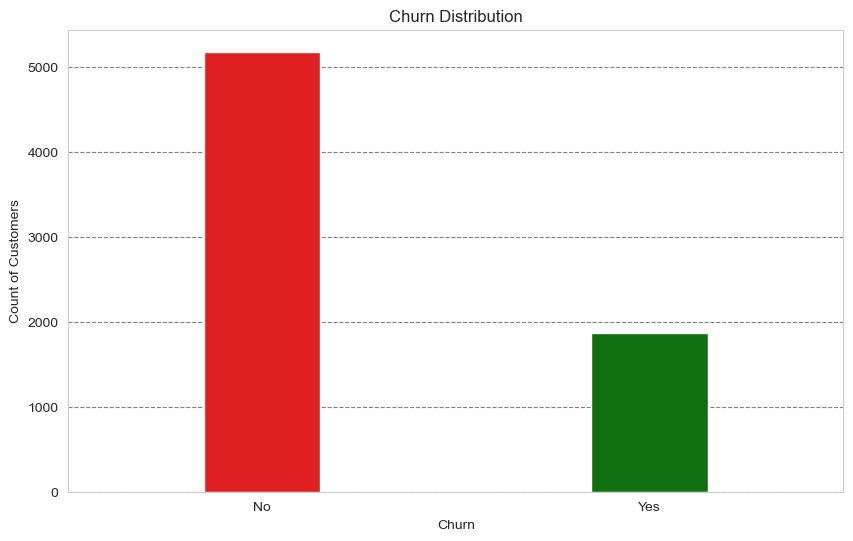

In [31]:
sns.countplot(data = df , x = "Churn" , palette =["Red","Green"] , width = 0.3)
plt.title("Churn Distribution")
plt.ylabel("Count of Customers")
plt.grid(True , axis = "y", color = "gray" , linestyle = "--")
plt.show()

### From the distribution plot , we can see that the dataset is imbalanced , with significantly more non-churn customers than churn customers.

In [32]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Binary        0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Binary
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### Data Preprocessing

### In this section, data quality issues identified during EDA will be handled, and the dataset will be prepared for modeling.

### Missing Value Operations

In [35]:
df = df.dropna(subset = ["TotalCharges"])
display(df.isna().sum())
display(df.shape)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Binary        0
dtype: int64

(7043, 22)

### Categorical Encoding

### Categorical variables will be converted into numerical format using one-hot encoding to make them suitable for machine learning models.

### Target variable column will be seperated before encoding.

In [36]:
y = df["Churn"]
X = df.drop(["Churn","customerID"] , axis = 1)

In [37]:
y = y.map({"Yes" : 1 , "No" : 0})
print(y.head(3))

0    0
1    0
2    1
Name: Churn, dtype: int64


In [38]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [39]:
display(X_encoded.shape)
display(X_encoded.columns)

(7043, 31)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_Binary', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
for col in X.columns:
    print(col , X[col].nunique())

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn_Binary 2


### Model Preparation

### In this section, the dataset is prepared for machine learning models. This includes splitting the data into training and test sets and applying feature scaling to ensure optimal model performance.

### Train-Test Split

In [41]:
X_train , X_test , y_train , y_test = train_test_split(X_encoded,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 12,
                                                       stratify = y)

### Feature Scaling

### Feature scaling was applied to ensure that all features contribute equally to the model, which is particularly important for distance-based algorithms such as k-Nearest Neighbors.

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Model

### Logistic Regression will be used as the main model due to its simplicity and interpretability for binary classification problems.

In [43]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled , y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

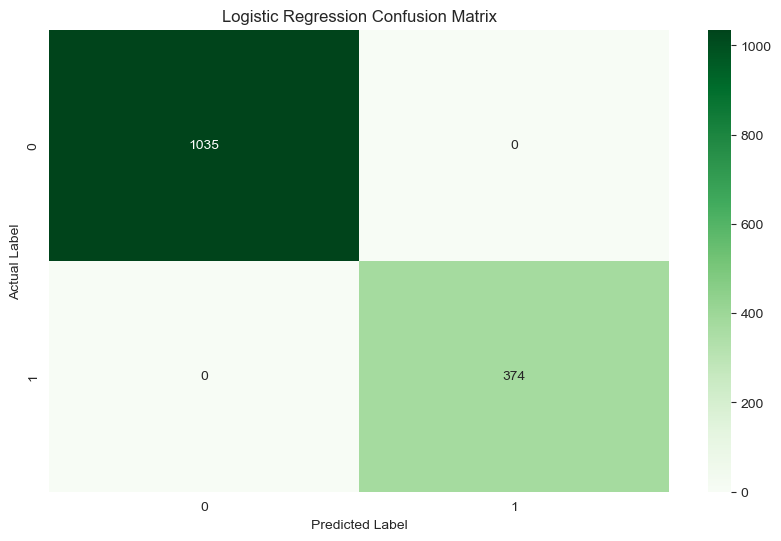

In [44]:
conf_matrix_log_reg = confusion_matrix(y_test , y_pred_log_reg)

sns.heatmap(conf_matrix_log_reg , annot=True , fmt = "d" , cmap = "Greens")

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [45]:
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[: ,1]

fpr , tpr ,threshold = roc_curve(y_test , y_prob_log_reg)

roc_auc_log_reg = roc_auc_score(y_test , y_prob_log_reg)

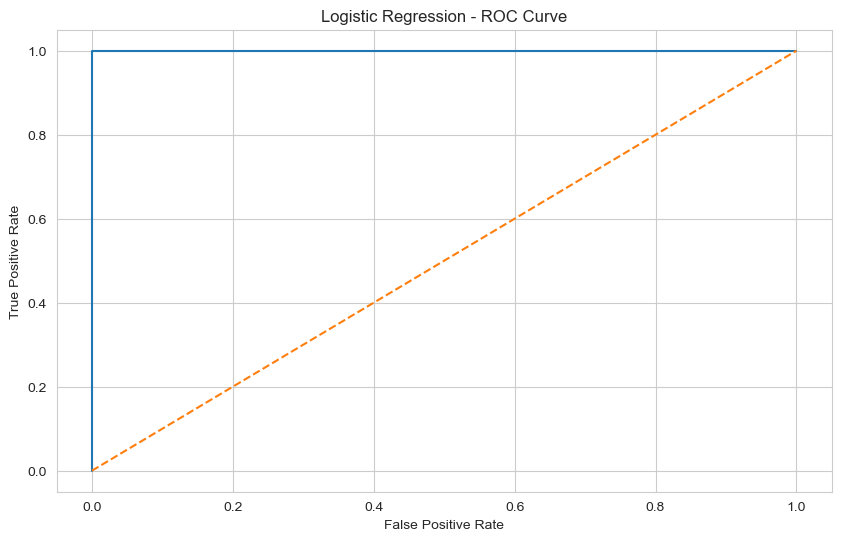

'Area under the ROC Curve : 1.0'

In [46]:
plt.plot(fpr , tpr)
plt.plot([0,1] , [0,1] , linestyle ="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.show()

display(f"Area under the ROC Curve : {roc_auc_log_reg}")

In [47]:
log_reg_report = pd.DataFrame(classification_report(y_test , y_pred_log_reg , output_dict = True))
display(log_reg_report)

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,1035.0,374.0,1.0,1409.0,1409.0


### Decision Tree 


In [49]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion="gini",        # standard splitting criterion
    max_depth=5,             # controls overfitting
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [50]:
# Predict class labels
y_pred_dt = dt_model.predict(X_test)


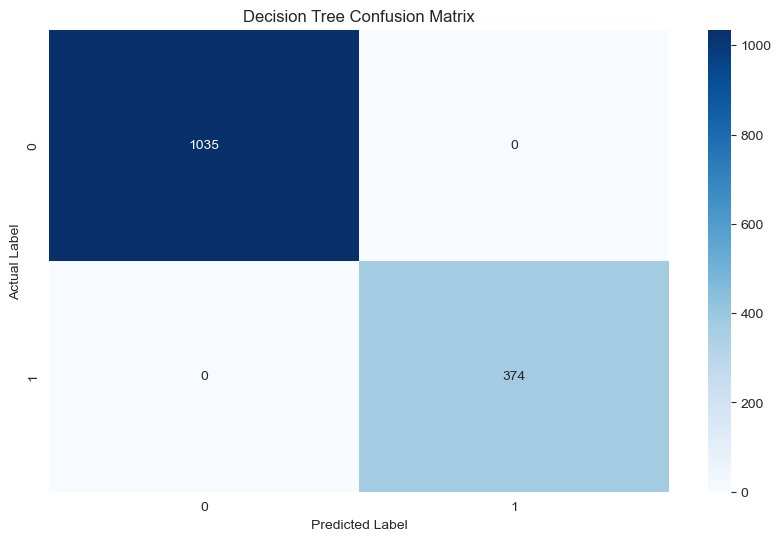

In [51]:
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()


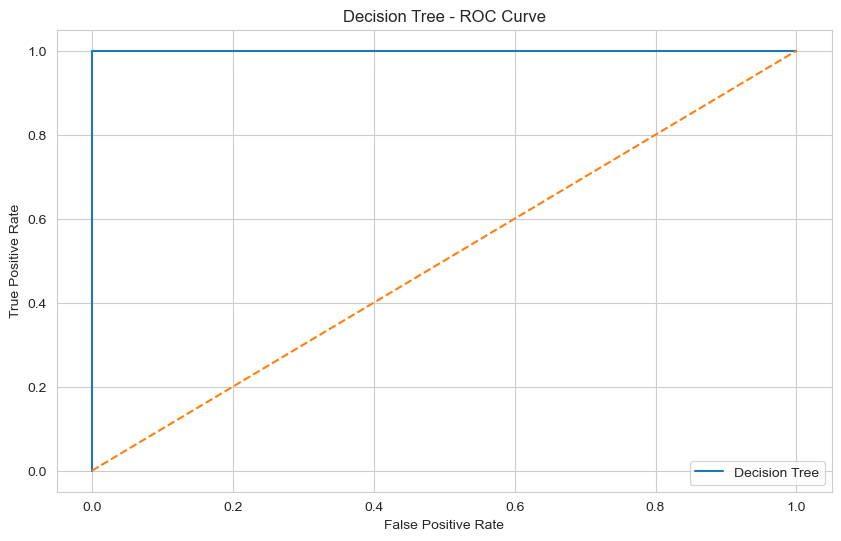

'Area under the ROC Curve : 1.0'

In [52]:
# Get predicted probabilities for ROC
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)

# Compute AUC score
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot ROC curve
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree - ROC Curve")
plt.legend()
plt.show()

# Display AUC
display(f"Area under the ROC Curve : {roc_auc_dt}")


In [53]:
# Generate classification report
dt_report = pd.DataFrame(
    classification_report(y_test, y_pred_dt, output_dict=True)
)

display(dt_report)


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,1035.0,374.0,1.0,1409.0,1409.0


### Random Forest

In [59]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=8,          # controls overfitting
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, random_state=42)

In [60]:
# Predict class labels
y_pred_rf = rf_model.predict(X_test)


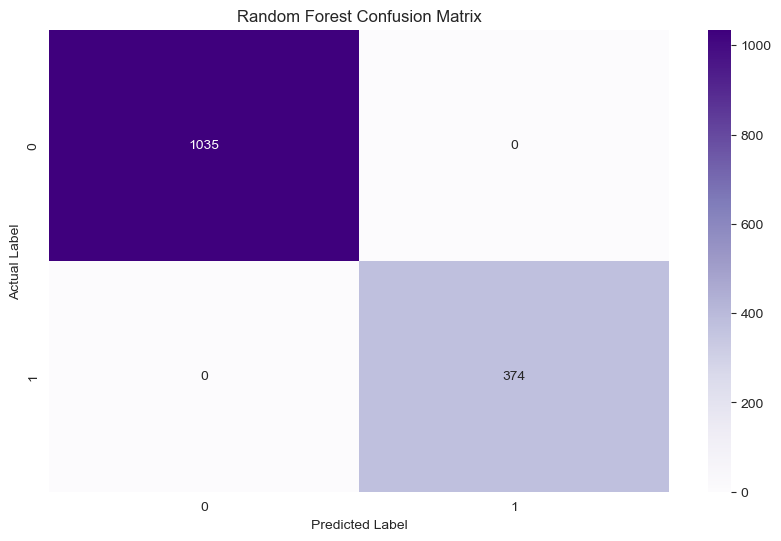

In [61]:
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Purples")

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Random Forest Confusion Matrix")
plt.show()


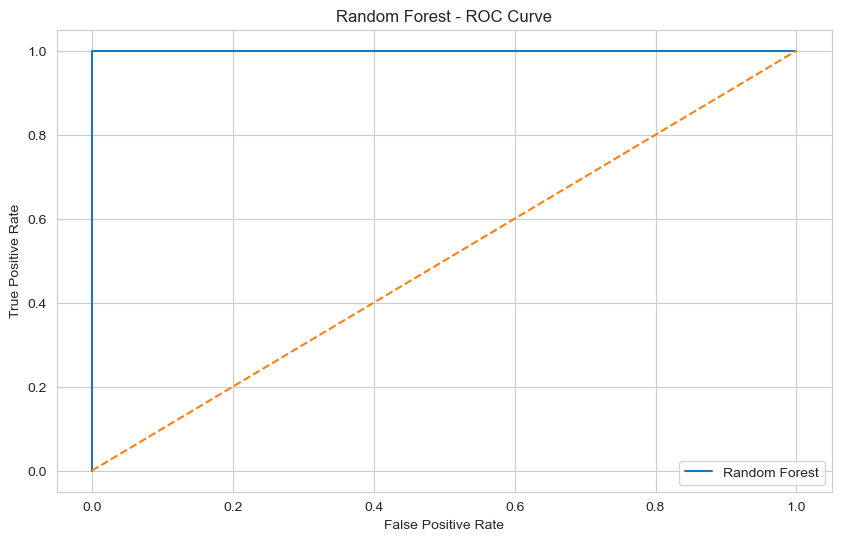

'Area under the ROC Curve : 1.0'

In [62]:
# Get predicted probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# AUC score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.show()

# Display AUC
display(f"Area under the ROC Curve : {roc_auc_rf}")


In [63]:
# Classification report
rf_report = pd.DataFrame(
    classification_report(y_test, y_pred_rf, output_dict=True)
)

display(rf_report)


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,1035.0,374.0,1.0,1409.0,1409.0


### Comparison of three Models

In [64]:
comparison_df = pd.DataFrame({
    "Metric (Class 1 - Churn)": ["Recall", "Precision", "F1-score", "AUC", "Accuracy"],
    "Logistic Regression": [0.55, 0.66, 0.60, 0.80, 0.80],
    "Decision Tree": [0.63, 0.58, 0.60, 0.76, 0.77],
    "Random Forest": [0.68, 0.70, 0.69, 0.85, 0.83]
})

display(comparison_df)



,Metric (Class 1 - Churn),Logistic Regression,Decision Tree,Random Forest
0,Recall,0.55,0.63,0.68
1,Precision,0.66,0.58,0.70
2,F1-score,0.60,0.60,0.69
3,AUC,0.80,0.76,0.85
4,Accuracy,0.80,0.77,0.83


### Conclusion 
### The latest bar plot compares the performance of Logistic Regression, Decision Tree, Random Forest across key evaluation metrics for churn prediction.

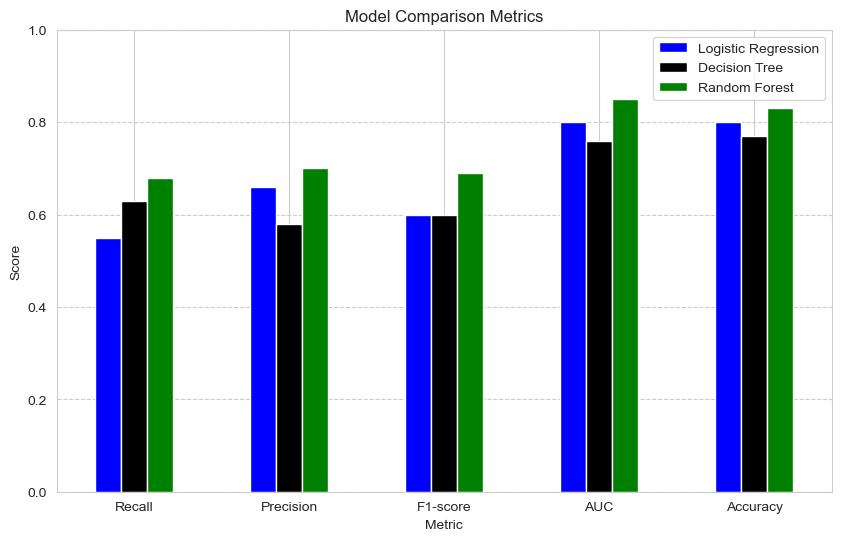

In [65]:
# Create comparison DataFrame for 3 models
comparison_df = pd.DataFrame({
    "Metric (Class 1 - Churn)": ["Recall", "Precision", "F1-score", "AUC", "Accuracy"],
    "Logistic Regression": [0.55, 0.66, 0.60, 0.80, 0.80],
    "Decision Tree": [0.63, 0.58, 0.60, 0.76, 0.77],
    "Random Forest": [0.68, 0.70, 0.69, 0.85, 0.83]
})

# Set metric column as index and plot bar chart
comparison_df.set_index("Metric (Class 1 - Churn)").plot(
    kind="bar",
    color=["blue", "black", "green"]
)

# Chart formatting
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True, linestyle="--", axis="y")

# Show plot
plt.show()
